Для решения я использую данную библиотеку
https://github.com/AutoViML/Auto_TS

Я действовал по этому руководству: https://www.section.io/engineering-education/time-series-analysis-and-forecasting-using-auto-time-series/

У меня Anaconda поэтому я выполнил эти команды для ее установки:

* conda install -c conda-forge fbprophet
* pip install auto-ts
* conda install dask distributed
* conda install -c conda-forge lightgbm
* conda install -c plotly plotly

Так же, чтобы все заработало понадобилось сделать вот так
https://github.com/facebook/prophet/issues/1574#issuecomment-812860262

* pip remove fbprophet
* pip install pystan==2.19.1.1
* pip install fbprophet

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
train = pd.read_csv("data/train.csv")
train

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [3]:
train.fillna(value=0.0, inplace=True)
train

,datetime,total
0,01.01.2005 00:00:00,0.0000
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [9]:
test = pd.read_csv("data/sample.csv")
test

,datetime,total
0,01.01.2009 00:00:00,0
1,01.01.2009 01:00:00,0
2,01.01.2009 02:00:00,0
3,01.01.2009 03:00:00,0
4,01.01.2009 04:00:00,0
...,...,...
4339,30.06.2009 19:00:00,0
4340,30.06.2009 20:00:00,0
4341,30.06.2009 21:00:00,0
4342,30.06.2009 22:00:00,0


In [4]:
# библиотека подсказывает как ей пользоваться!
import auto_ts as AT

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [5]:
ts_column = 'datetime'
sep = ','
target = 'total'

In [7]:
ml_dict = AT.auto_timeseries(score_type='rmse',
                             time_interval='H',
                             non_seasonal_pdq=None,
                             seasonality=True,
                             seasonal_period=12,
                             model_type=['Prophet'],
                             verbose=2)


Start of Fit.....
    Target variable given as = total
Start of loading of data.....
    Inputs: ts_column = datetime, sep = ,, target = ['total']
    Using given input: pandas dataframe...
    datetime column exists in given train data...
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check input and try again.
date time format cannot be inferred. Please check 

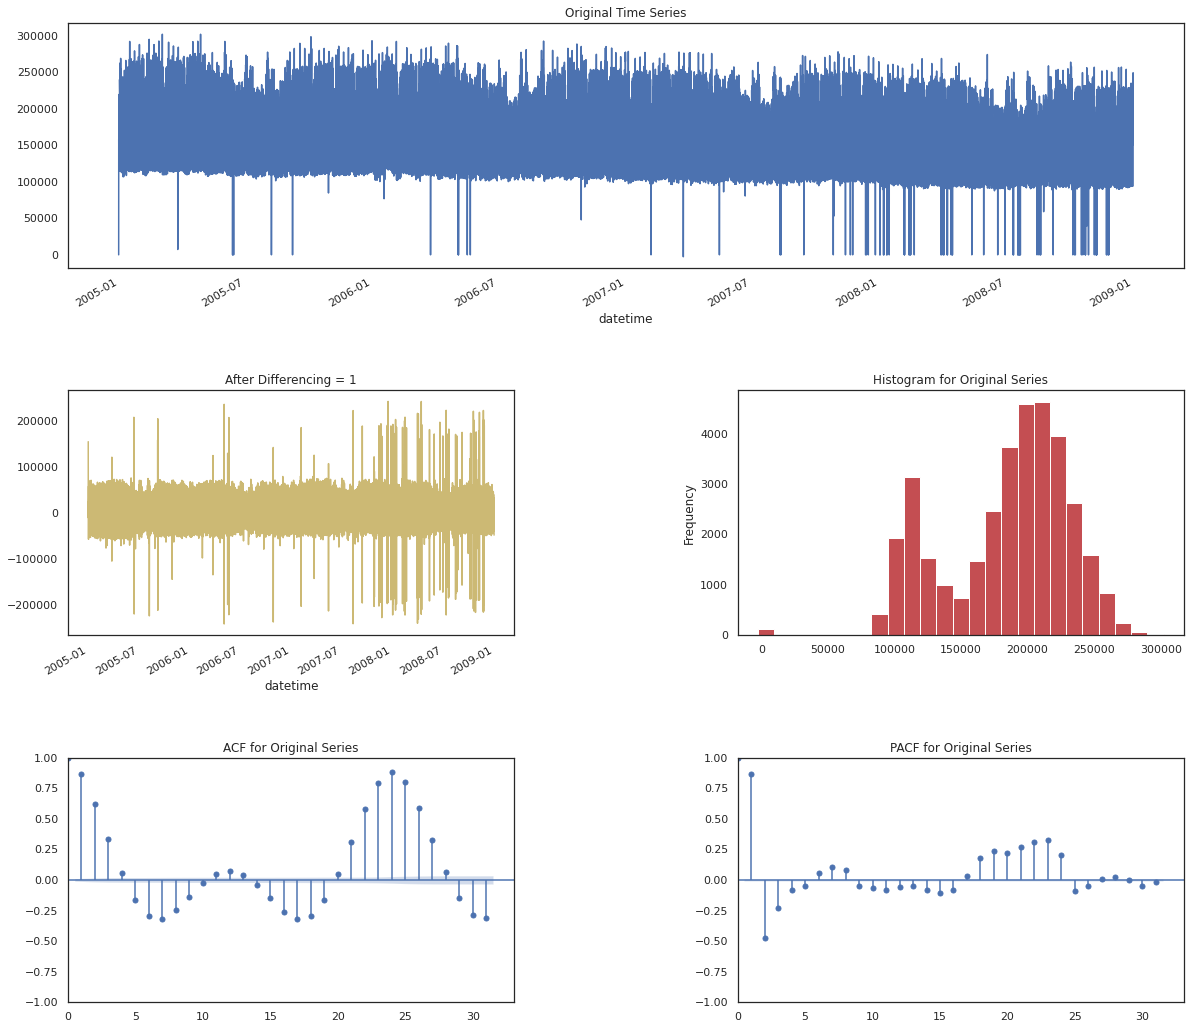

Time Interval is given as H
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(35064, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding hourly seasonality to Prophet with period=12, fourier_order=5 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 35039 Test Shape: 5
Initial log joint probability = -2500.7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       18579.7      0.859975       80226.1   2.714e-05       0.001        9   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       2       48276.7       1.08026        242956           1           1       10   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
  

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1       9016.38      0.731896       88665.4   2.207e-05       0.001        9   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       2       19100.1      0.200184       32783.1           1           1       10   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       3       28916.8      0.445656       97422.7       0.697           1       12   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       4       43710.7      0.546364        177583      0.7312      0.7312       13   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       5       48517.6      0.363445        139781      0.1078           1       17   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       6     

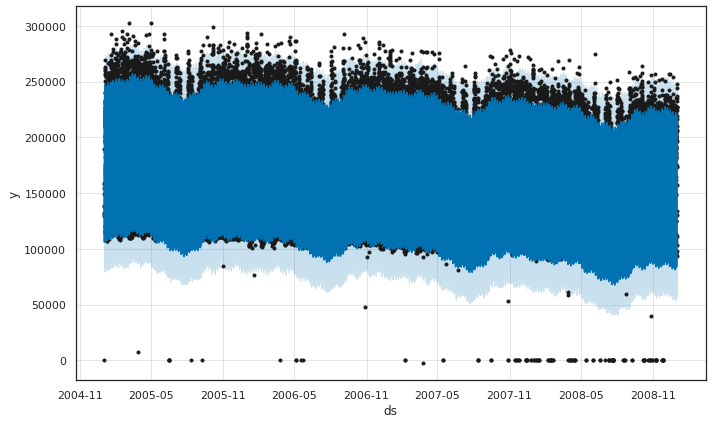

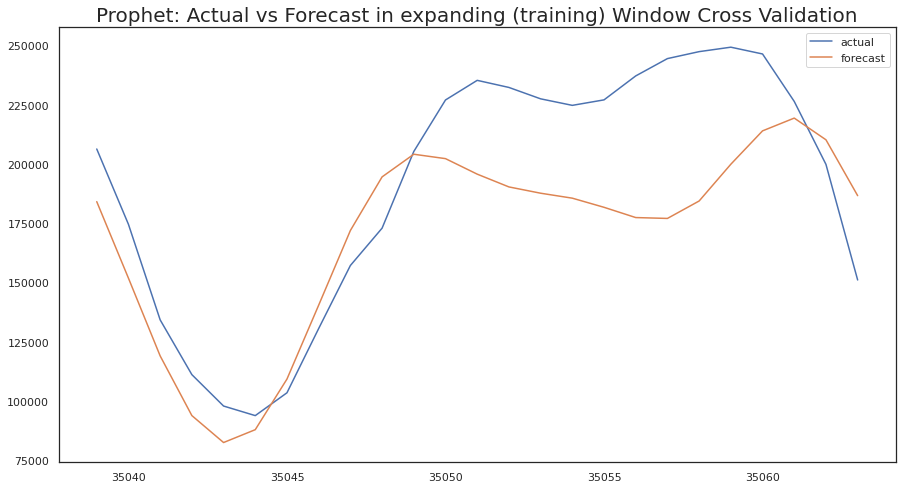

In [8]:
ml_dict.fit( traindata=train, ts_column=ts_column, target=target, cv=5, sep="," )

In [19]:
pred = ml_dict.predict(test, model='best')

Predicting using test dataframe as input for Prophet model
Building Forecast dataframe. Forecast Period = 4344


In [20]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35064,2009-01-01 00:00:00,166514.563287,126634.471819,178557.090327,166514.563287,166514.563287,-13479.537020,-13479.537020,-13479.537020,-16607.369006,...,551.786300,551.786300,551.786300,2576.045687,2576.045687,2576.045687,0.0,0.0,0.0,153035.026267
35065,2009-01-01 01:00:00,166513.706724,93810.637474,147095.234520,166513.706724,166513.706724,-46435.825266,-46435.825266,-46435.825266,-49526.275661,...,514.270732,514.270732,514.270732,2576.179663,2576.179663,2576.179663,0.0,0.0,0.0,120077.881458
35066,2009-01-01 02:00:00,166512.850162,68582.786445,122533.778525,166512.850162,166512.850162,-71770.451480,-71770.451480,-71770.451480,-74824.763020,...,477.985754,477.985754,477.985754,2576.325786,2576.325786,2576.325786,0.0,0.0,0.0,94742.398682
35067,2009-01-01 03:00:00,166511.993600,55707.664725,109297.836946,166511.993600,166511.993600,-83289.867274,-83289.867274,-83289.867274,-86310.209476,...,443.858318,443.858318,443.858318,2576.483883,2576.483883,2576.483883,0.0,0.0,0.0,83222.126326
35068,2009-01-01 04:00:00,166511.137038,60749.692242,114863.620826,166511.137038,166511.137038,-77867.381126,-77867.381126,-77867.381126,-80856.776126,...,412.741216,412.741216,412.741216,2576.653783,2576.653783,2576.653783,0.0,0.0,0.0,88643.755911


In [21]:
y_pred = pred['yhat']
y_pred

35064    153035.026267
35065    120077.881458
35066     94742.398682
35067     83222.126326
35068     88643.755911
             ...      
39403    182129.609099
39404    196360.620421
39405    201890.311015
39406    192859.165977
39407    169387.037071
Name: yhat, Length: 4344, dtype: float64

In [29]:
test['total'] = y_pred.values

In [30]:
test

,datetime,total
0,01.01.2009 00:00:00,153035.026267
1,01.01.2009 01:00:00,120077.881458
2,01.01.2009 02:00:00,94742.398682
3,01.01.2009 03:00:00,83222.126326
4,01.01.2009 04:00:00,88643.755911
...,...,...
4339,30.06.2009 19:00:00,182129.609099
4340,30.06.2009 20:00:00,196360.620421
4341,30.06.2009 21:00:00,201890.311015
4342,30.06.2009 22:00:00,192859.165977


In [35]:
submission_path = 'submission/Auto_TS_submission.csv'

In [36]:
test.to_csv(submission_path, index=False)